# Industry Project

## Problem Statement

Tripadvisor is a tremendous social medial platform for both travelers and advertisers. As of 2020, Tripadvisor's total user reviews and opinions reached 884 million, covering listings for restaurants, hotels, vacation rentals, and attractions. It provides its members with great content from the people, brands, and influencers they rely on for travel and in-destination advice.


A success story for Selenta, they listed Sofia Hotel with Tripadvisor and received a good review rating.  While a partner with Tripadvisor, SOFIA Hotel got more traffic and Maximized visibility. SOFIA's online reputation cycle has also accelerated.


The H hotel's business development department wants to list the hotel on the TripAdvisor website. The survey result shows 96% of TripAdvisor users consider review rating necessary when planning trips and booking hotels. With online reviews rating having such a strong influence on consumers, the Business Development team tasked the data analyzing unit to develop a model to predict possible H hotel review ratings on TripAdvisor after the listing based on their current customers' feedback Book.com or other platforms. It will reinforce the value of successful online reputation management for hotels and the resulting positive impact on revenue.


In this project, we use the TripAdvisor dataset from Data Set (uiuc.edu) instead of scraping from Tripadvisor website as it will take serveral month to complete. It contains 12,773 JSON files; each JSON file contains the reviews and the ratings from different aspects. We will use the primary classifier as a baseline model to predict the overall rating. Further, we will use other advanced models/techniques like Multinomial Naive Bay to see any improvement. The accuracy score will guide the model's performance. Ultimately, we will conclude the best model based on the accuracy score.


From EDA, we can see some challenges we may face. The datasets contain unbalanced rating classes for all rating aspects. If we train a classification model without fixing this problem, the model will be completely biased. It also impacts the correlations between features. It is essential to balance the dataset; secondly, an extensive data set has high dimension text features (325740 features), which means the data may consist of many modeling noises. We have to find the right approach for dimension reduction. Lastly, it seems more challenging to predict aspects rating, and we could include this topic in further studies.


In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [99]:
#import all the libraries
import json,os
import ast
import pandas as pd
import numpy as np
import seaborn as sns
from os import path
from PIL import Image
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk import ngrams
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

## 1. File loading

TripAdvisor dataset download from the [website](http://times.cs.uiuc.edu/~wang296/Data/). It contains 12,773 JSON files; each JSON file contains the reviews and the ratings from different aspects. I loaded the JSON file and converted it to the CSV file. Do not run the code for the loading and converting process as it took hours to complete.

In [4]:
#directory_path = "./json/"
#json_files = [pos_json for pos_json in os.listdir(directory_path) if pos_json.endswith('.json')]
#file=[]
#for ind in range(12773):
    #with open(directory_path+json_files[ind]) as f:
             #file.append(json.load(f))
#tripadvisor = pd.DataFrame()
#for ind in range(len(file)):
      #tripadvisor.append(pd.json_normalize (file[ind]["Reviews"]))

#tripadvisor.to_csv('./tripadvisor.csv')

In [5]:
#load the CSV file 
df = pd.read_csv('./tripadvisor.csv')

## 2. Data Cleaning

In [6]:
#check the datafram 
df.shape

(1621956, 9)

In [7]:
#display first 5 rows
df.head()

,Unnamed: 0,Unnamed: 0.1,Ratings,AuthorLocation,Title,Author,ReviewID,Content,Date
0,0,0,"{'Service': '5', 'Cleanliness': '5', 'Overall'...","Jacksonville, Florida",“Great place and location”,Nadine R,UR128178025,"Usually stay near the airport, but this trip w...","April 19, 2012"
1,1,1,"{'Service': '4', 'Cleanliness': '4', 'Overall'...","Chillicothe, Ohio","“Nice stay, nice surroundings”",blt3116,UR123847354,Stayed at this Hilton for 2 nights. It was lik...,"January 30, 2012"
2,2,2,"{'Service': '5', 'Cleanliness': '5', 'Overall'...",Northern Virginia,“Perfect for an overnight just off I-95”,ExSpec5,UR122192448,"Stayed there one night, December 16, on the wa...","December 28, 2011"
3,3,3,"{'Service': '5', 'Cleanliness': '5', 'Overall'...",Raleigh,“Great Hotel”,kevinlynch3,UR122031890,I just stayed here last weekend and have alrea...,"December 23, 2011"
4,4,4,"{'Service': '5', 'Cleanliness': '5', 'Overall'...","Belmont, MA",“good room for handicapped person”,nobumponalog,UR119295575,My mother who is 90 and I stayed one night on ...,"October 14, 2011"


In [8]:
#drop the unnecessary rows
df=df.drop(columns=["Unnamed: 0","Unnamed: 0.1","AuthorLocation","Author","Date","ReviewID"],inplace=False)

In [9]:
#convert the column "Rating" to dataframe
rating=[]
for item in df['Ratings'].values.tolist():
          rating.append(ast.literal_eval(item))
df2 = pd.DataFrame(rating)

In [10]:
df2.head()

,Service,Cleanliness,Overall,Value,Sleep Quality,Rooms,Location,"Business service (e.g., internet access)",Check in / front desk,Business service
0,5,5,5.0,5,5,5,5,NaN,NaN,NaN
1,4,4,4.0,4,4,4,5,NaN,NaN,NaN
2,5,5,4.0,3,3,5,5,NaN,NaN,NaN
3,5,5,5.0,4,5,5,5,NaN,NaN,NaN
4,5,5,5.0,4,5,5,5,NaN,NaN,NaN


In [11]:
#merge the dateframe with the original dateframe by index
df=pd.concat([df, df2], axis=1).reindex(df.index)

In [12]:
#drop the "ratings" column
df=df.drop(columns=["Ratings"])

In [13]:
#creat a column combine "Title" and "Content"
df["feature"] = df["Title"] + " " + df["Content"]

In [14]:
#check the duplicated rows
df.duplicated().value_counts()

False    1178978
True      442978
dtype: int64

In [15]:
#drop teh duplicate rows in dataframe
df=df.drop_duplicates()

In [16]:
#convert the column "feature" to str
df['feature'] = df['feature'].astype('str') 

In [17]:
df.isnull().sum()

Title                                        145112
Content                                           0
Service                                       92119
Cleanliness                                   93822
Overall                                           0
Value                                         92412
Sleep Quality                                635069
Rooms                                        182349
Location                                     230504
Business service (e.g., internet access)    1069297
Check in / front desk                        855563
Business service                            1033866
feature                                           0
dtype: int64

In [18]:
#fill Nan value with O as Machine learning need the number input in modeling part
df.fillna(0, inplace = True)

In [19]:
#drop the unnecessary rows
df=df.drop(columns=["Title","Content"])

In [20]:
#check the data type in dataframe
df.dtypes

Service                                     object
Cleanliness                                 object
Overall                                     object
Value                                       object
Sleep Quality                               object
Rooms                                       object
Location                                    object
Business service (e.g., internet access)    object
Check in / front desk                       object
Business service                            object
feature                                     object
dtype: object

In [21]:
#change the data type
df[["Service","Cleanliness","Overall","Value","Sleep Quality","Rooms","Location","Business service (e.g., internet access)",\
    "Check in / front desk","Business service"]]=df[["Service","Cleanliness","Overall","Value","Sleep Quality","Rooms",\
                                                     "Location","Business service (e.g., internet access)",\
                                                     "Check in / front desk","Business service"]].astype('float')

In [22]:
#change the data type
df["feature"]= df["feature"].astype('str')

In [23]:
#rename the columns
df=df.rename(columns={"Service": "service", "Cleanliness": "cleanliness","Overall":"overall","Value":"value",\
                   "Sleep Quality":"sleep_quality","Rooms":"room","Location":"location",\
                  "Business service (e.g., internet access)":"internet_service","Check in / front desk":"front_desk",\
                     "Business service":"business_service"})

In [24]:
#check the statistic information
df.describe()

,service,cleanliness,overall,value,sleep_quality,room,location,internet_service,front_desk,business_service
count,1.178978e+06,1.178978e+06,1.178978e+06,1.178978e+06,1.178978e+06,1.178978e+06,1.178978e+06,1.178978e+06,1.178978e+06,1.178978e+06
mean,3.568174e+00,3.719172e+00,3.924541e+00,3.416410e+00,1.881992e+00,3.159192e+00,3.171195e+00,3.340427e-01,7.920971e-01,8.126275e-02
std,1.764858e+00,1.751856e+00,1.212681e+00,1.777834e+00,2.179958e+00,1.902424e+00,2.164972e+00,1.111197e+00,1.769487e+00,8.585213e-01
min,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00
25%,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


There is the outlier -1 in the dataset. -1 is an impossible value for the Tripadvisor rating system. I also realize that there is no rating of 1 existing in the dataset. It should be an error when collecting or converting the data. -1 should be 1. Thus, I replace all -1 with value 1

In [25]:
#drop the outliers
df=df.replace(-1, 1)

In [26]:
#check the data again
df.describe()

,service,cleanliness,overall,value,sleep_quality,room,location,internet_service,front_desk,business_service
count,1.178978e+06,1.178978e+06,1.178978e+06,1.178978e+06,1.178978e+06,1.178978e+06,1.178978e+06,1.178978e+06,1.178978e+06,1.178978e+06
mean,3.626773e+00,3.780807e+00,3.924541e+00,3.491490e+00,1.881992e+00,3.214884e+00,3.290890e+00,3.340427e-01,9.117515e-01,2.411266e-01
std,1.641070e+00,1.614540e+00,1.212681e+00,1.625438e+00,2.179958e+00,1.806718e+00,1.978288e+00,1.111197e+00,1.710910e+00,8.279616e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


In [27]:
#check the data shape again
df.shape

(1178978, 11)

In [28]:
df.head()

,service,cleanliness,overall,value,sleep_quality,room,location,internet_service,front_desk,business_service,feature
0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,“Great place and location” Usually stay near t...
1,4.0,4.0,4.0,4.0,4.0,4.0,5.0,0.0,0.0,0.0,"“Nice stay, nice surroundings” Stayed at this ..."
2,5.0,5.0,4.0,3.0,3.0,5.0,5.0,0.0,0.0,0.0,“Perfect for an overnight just off I-95” Staye...
3,5.0,5.0,5.0,4.0,5.0,5.0,5.0,0.0,0.0,0.0,“Great Hotel” I just stayed here last weekend ...
4,5.0,5.0,5.0,4.0,5.0,5.0,5.0,0.0,0.0,0.0,“good room for handicapped person” My mother w...


In [29]:
# Save it to CSV file
#df.to_csv('./tripadvisor_clean.csv')

#### Data Dictionary

|Features                    | Type    |Description
|:---------------------------|:--------|:----------------------------------------------------------------------------------------
| feature                    | string  |customer review combine review title and content
| service                    | float   |rating 1 to 5 , 0: no rating for this aspect
| cleanliness                | float   |rating 1 to 5 , 0: no rating for this aspect
| overall                    | float   |rating 1 to 5 , 0: no rating for this aspect
| value                      | float   |rating 1 to 5 , 0: no rating for this aspect
| sleep_quality	             | float   |rating 1 to 5 , 0: no rating for this aspect
| room                       | float   |rating 1 to 5 , 0: no rating for this aspect
| location                   | float   |rating 1 to 5 , 0: no rating for this aspect
| internet_service           | float   |rating 1 to 5 , 0: no rating for this aspect
| business_service           | float   |rating 1 to 5 , 0: no rating for this aspect           
| front_desk                 | float   |rating 1 to 5 , 0: no rating for this aspect

## 3. EDA

In [30]:
#read the csv File
df = pd.read_csv('./tripadvisor_clean.csv')

In [31]:
df.head()

,Unnamed: 0,service,cleanliness,overall,value,sleep_quality,room,location,internet_service,front_desk,business_service,feature
0,0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,“Great place and location” Usually stay near t...
1,1,4.0,4.0,4.0,4.0,4.0,4.0,5.0,0.0,0.0,0.0,"“Nice stay, nice surroundings” Stayed at this ..."
2,2,5.0,5.0,4.0,3.0,3.0,5.0,5.0,0.0,0.0,0.0,“Perfect for an overnight just off I-95” Staye...
3,3,5.0,5.0,5.0,4.0,5.0,5.0,5.0,0.0,0.0,0.0,“Great Hotel” I just stayed here last weekend ...
4,4,5.0,5.0,5.0,4.0,5.0,5.0,5.0,0.0,0.0,0.0,“good room for handicapped person” My mother w...


In [32]:
#drop Unnamed
df=df.drop(columns=["Unnamed: 0"])

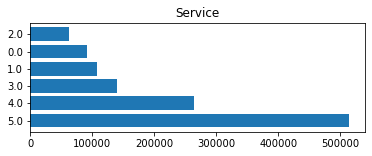

In [33]:
#plot the distribution plot for Target variable
ax=df.service.value_counts().plot(kind="barh",figsize=(6,2),title="Service",width=0.8)
ax.set_facecolor('white')

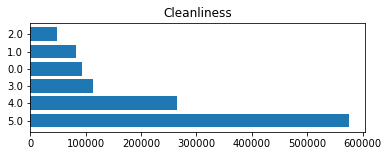

In [34]:
#plot the distribution plot for Target variable
ax=df.cleanliness.value_counts().plot(kind="barh",figsize=(6,2),title="Cleanliness",width=0.8)
ax.set_facecolor('white')

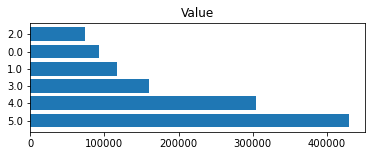

In [35]:
#plot the distribution plot for Target variable
ax=df.value.value_counts().plot(kind="barh",figsize=(6,2),title="Value",width=0.8)
ax.set_facecolor('white')

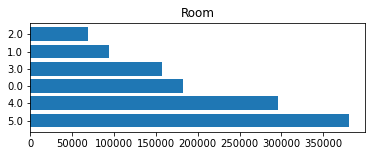

In [36]:
#plot the distribution plot for Target variable
ax=df.room.value_counts().plot(kind="barh",figsize=(6,2),title="Room",width=0.8)
ax.set_facecolor('white')

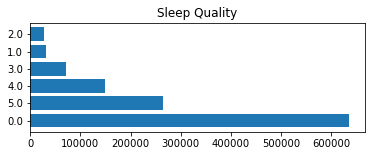

In [37]:
#plot the distribution plot for Target variable
ax=df.sleep_quality.value_counts().plot(kind="barh",figsize=(6,2),title="Sleep Quality",width=0.8)
ax.set_facecolor('white')

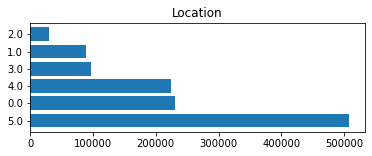

In [38]:
#plot the distribution plot for Target variable
ax=df.location.value_counts().plot(kind="barh",figsize=(6,2),title="Location",width=0.8)
ax.set_facecolor('white')

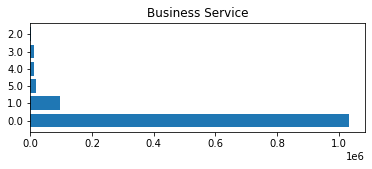

In [39]:
#plot the distribution plot for Target variable
ax=df.business_service.value_counts().plot(kind="barh",figsize=(6,2),title="Business Service",width=0.8)
ax.set_facecolor('white')

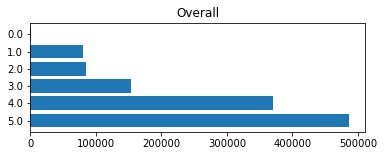

In [40]:
#plot the distribution plot for Target variable
ax=df.overall.value_counts().plot(kind="barh",figsize=(6,2),title="Overall",width=0.8)
ax.set_facecolor('white')

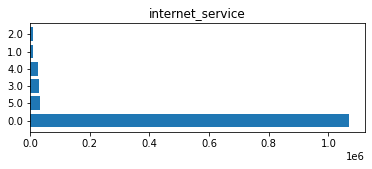

In [41]:
#plot the distribution plot for Target variable
ax=df.internet_service.value_counts().plot(kind="barh",figsize=(6,2),title="internet_service",width=0.8)
ax.set_facecolor('white')

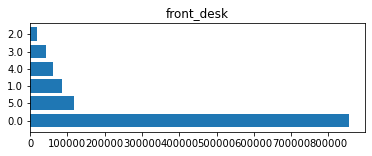

In [42]:
#plot the distribution plot for Target variable
ax=df.front_desk.value_counts().plot(kind="barh",figsize=(6,2),title="front_desk",width=0.8)
ax.set_facecolor('white')

It contains the unbalanced classes of rating for all rating aspects

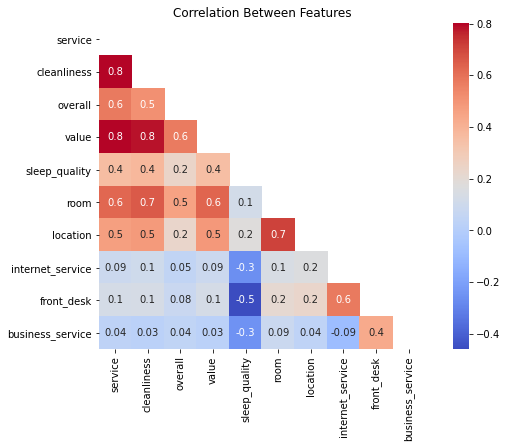

In [43]:
# Investigate for features that are highly correlated to one another.

plt.figure(figsize = (10,6))
plt.title('Correlation Between Features', size=12)
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, fmt='.1g', mask=matrix, cmap= 'coolwarm', square=True);

#### From EDA, we could see this is an unbanlanced dataset for all classes. we will balance the class by downsizing the majority group. In summary, there were approximately 884 million reviews on Tripadvisor as of 2020, and we will assume the sample rating mean for Tripadvisor users will be normally distributed. According to the [sample size statistic calculation](https://www.surveysystem.com/sscalc.htm), we only need a thousand samples to achieve Confidence Level:95% and confidence interval:3% to represent the whole population's choices. Hence we will downsize the Majority group because we have enough data points. Rating=0 means the missing rating score in this dataset; we will ignore/drop those unrated data points as we have enough data.

#### Also, from the Heatmap, we can see some aspects of rating are highly correlated to the overall rating. We will remove all the aspect rating, only keep the overall rating. To better predict the overall rating, it is necessary to identify the groups of words (called a topic) from a collection of documents containing the best information in the pool, which will not cover in this project. We will only focus on classifying the overall rating based on the review contents.

In [44]:
#balance the dataset by downsize the majority class
df_majority = df[df.overall==5]
df_minority = df[df.overall==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=80794,     # to match minority class
                                 random_state=123) # reproducible results
df_3 = resample(df[df.overall==3], 
                                 replace=False,    # sample without replacement
                                 n_samples=80794,     # to match minority class
                                 random_state=123) # reproducible results
df_4 = resample(df[df.overall==4], 
                                 replace=False,    # sample without replacement
                                 n_samples=80794,     # to match minority class
                                 random_state=123) # reproducible results
df_2 = resample(df[df.overall==2], 
                                 replace=False,    # sample without replacement
                                 n_samples=80794,     # to match minority class
                                 random_state=123) # reproducible results
  
 
# Combine minority class with downsampled majority class
overall = pd.concat([df_majority_downsampled, df_minority])
overall = pd.concat([overall, df_3])
overall = pd.concat([overall, df_4])
overall = pd.concat([overall, df_2])
overall["overall"].value_counts()

3.0    80794
5.0    80794
4.0    80794
2.0    80794
1.0    80794
Name: overall, dtype: int64

In [45]:
#change the data type
overall["feature"]= overall["feature"].astype('str')

In [46]:
overall=overall.drop(columns=["service","room","cleanliness","location","business_service","sleep_quality","value",\
                      "front_desk","internet_service"])

In [47]:
overall.shape

(403970, 2)

In [48]:
overall.head()

,overall,feature
769838,5.0,“Rockstar Service at a Reasonable Price” The S...
218635,5.0,“Perfect transit hotel for those longer stays....
655395,5.0,“Why Stay Anywhere Else?” We just returned fro...
501479,5.0,“Loved Casa Verada” We highly recommend Casa V...
645801,5.0,“Great Valuea and Very Comfortable” I received...


In [49]:
overall.dtypes

overall    float64
feature     object
dtype: object

## 4. Extract the Adjective Words

By a quick review of the contents, we could notice some unnecessary pieces of information, e.g., “I just stay there at the weekend.” A phrase like this is unlikely useful for modeling and predicting. Hence, I decided to remove those unwanted nouns/verbs and only keep the adjective words for further process.

In [50]:
def get_adjectives(text):
    blob = TextBlob(text)
    return [ word for (word,tag) in blob.tags if tag == "JJ"]

In [51]:
#do not run the code , take very long time to complete the run.
#overall["adjective"]=overall["feature"].apply(get_adjectives)
#overall.to_csv('./overall.csv')

## 5. Text Mining of the Review Text

### Text Features Cleaning for Visualizations

While ploting the Wordcloud and EDA, I noticed that there are many stopwords, single letters and punctuations which contain the unneccessary informations. Hence I added this step to remove them. For some spelling errors, I want to return them to the same root form. Stemming and Lemmatization both generate the root form of the inflected words. but Stemming follows an algorithm with steps to perform on the words which makes it faster but its results are far from prefect which can cause issues like overstemming and understemming. so I am going to use Lemmatization as lemma is an actual language word.

In [52]:
#read the csv File
overall = pd.read_csv('./overall.csv')

In [53]:
#define a funtion to clean the text feature
def clean_text(feature):
   
    # 1. remove punctuations, single letters, "http", ect unneccessary words 
    letters_only = re.sub("\W", " ", feature)
    remove_single_letter = re.sub(" \w ", " ", letters_only)
    remove_single_number = re.sub(" \w ", " ", remove_single_letter)

    
     # 2. Convert to lower case, split into individual words.
    words = remove_single_number.lower().split()
    
     # 3. Convert the stop words to a set.
    stops = set(stopwords.words('english'))
    
     # 4. Remove stop words.
    meaningful_words = [w for w in words if not w in stops]
   
     # 5. return base/dictionary form of a word
    lemmatizer = WordNetLemmatizer()
    meaningful_words_lem = [lemmatizer.lemmatize(i) for i in meaningful_words]
     
    return (" ".join(meaningful_words_lem))

In [54]:
#clean the text feature and put them in the seperate list
cleantext_1=[]
for review in overall["adjective"][overall["overall"]==1.0]:
          cleantext_1.append(clean_text(review))

In [55]:
#clean the text feature and put them in the seperate list
cleantext_2=[]
for review in overall["adjective"][overall["overall"]==2.0]:
         cleantext_2.append(clean_text(review))

In [56]:
#clean the text feature and put them in the seperate list
cleantext_3=[]
for review in overall["adjective"][overall["overall"]==3.0]:
         cleantext_3.append(clean_text(review))

In [57]:
#clean the text feature and put them in the seperate list
cleantext_4=[]
for review in overall["adjective"][overall["overall"]==4.0]:
         cleantext_4.append(clean_text(review))

In [58]:
#clean the text feature and put them in the seperate list
cleantext_5=[]
for review in overall["adjective"][overall["overall"]==5.0]:
         cleantext_5.append(clean_text(review))

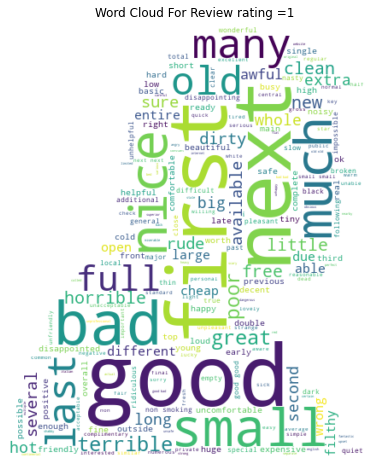

In [59]:
## Draw word cloud for reviews
text = " ".join(reviews for reviews in cleantext_1)
twitter_mask = np.array(Image.open("./trump_mask.png"))
wordcloud = WordCloud(background_color="white",mask=twitter_mask,).generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud For Review rating =1")
plt.axis("off")
plt.show()

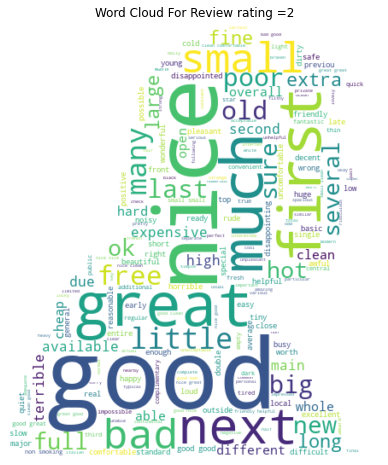

In [60]:
## Draw word cloud for reviews
text = " ".join(reviews for reviews in cleantext_2)
twitter_mask = np.array(Image.open("./trump_mask.png"))
wordcloud = WordCloud(background_color="white",mask=twitter_mask).generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud For Review rating =2")
plt.axis("off")
plt.show()

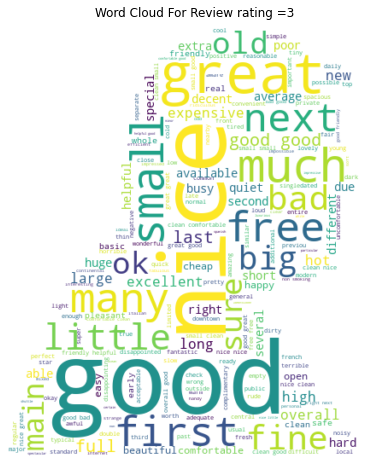

In [61]:
## Draw word cloud for reviews
text = " ".join(reviews for reviews in cleantext_3)
twitter_mask = np.array(Image.open("./trump_mask.png"))
wordcloud = WordCloud(background_color="white",mask=twitter_mask).generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud For Review rating =3")
plt.axis("off")
plt.show()

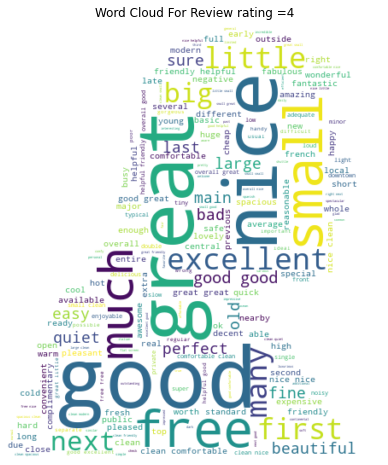

In [62]:
## Draw word cloud for reviews
text = " ".join(reviews for reviews in cleantext_4)
twitter_mask = np.array(Image.open("./trump_mask.png"))
wordcloud = WordCloud(background_color="white",mask=twitter_mask).generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud For Review rating =4")
plt.axis("off")
plt.show()

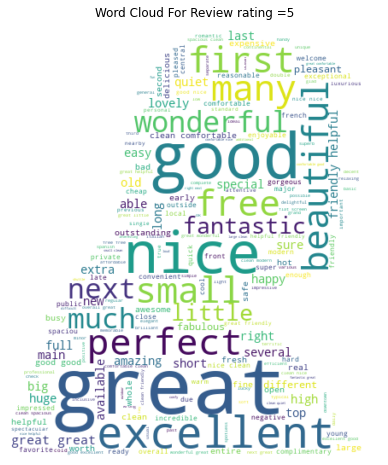

In [63]:
## Draw word cloud for reviews
text = " ".join(reviews for reviews in cleantext_5)
twitter_mask = np.array(Image.open("./trump_mask.png"))
wordcloud = WordCloud(background_color="white",mask=twitter_mask).generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud For Review rating =5")
plt.axis("off")
plt.show()

#### Draw the Bar Chart for top 30 words for each Group

In [64]:
#define a funtion to calculate the words frequency
def word_frequency(sentence):
    sentence =" ".join(sentence)
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words("english")]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    counted = Counter(new_tokens)
    counted_2= Counter(ngrams(new_tokens,2))
    counted_3= Counter(ngrams(new_tokens,3))
    word_freq = pd.DataFrame(counted.items(),columns=["word","frequency"]).sort_values(by="frequency",ascending=False)
    word_pairs =pd.DataFrame(counted_2.items(),columns=["pairs","frequency"]).sort_values(by="frequency",ascending=False)
    trigrams =pd.DataFrame(counted_3.items(),columns=["trigrams","frequency"]).sort_values(by="frequency",ascending=False)
    return word_freq,word_pairs,trigrams

In [78]:
data1=word_frequency(cleantext_1)[0]
data2=word_frequency(cleantext_2)[0]
data3=word_frequency(cleantext_3)[0]
data4=word_frequency(cleantext_4)[0]
data5=word_frequency(cleantext_5)[0]

Text(0.5, 1.0, 'Top 30 words in Rating 5')

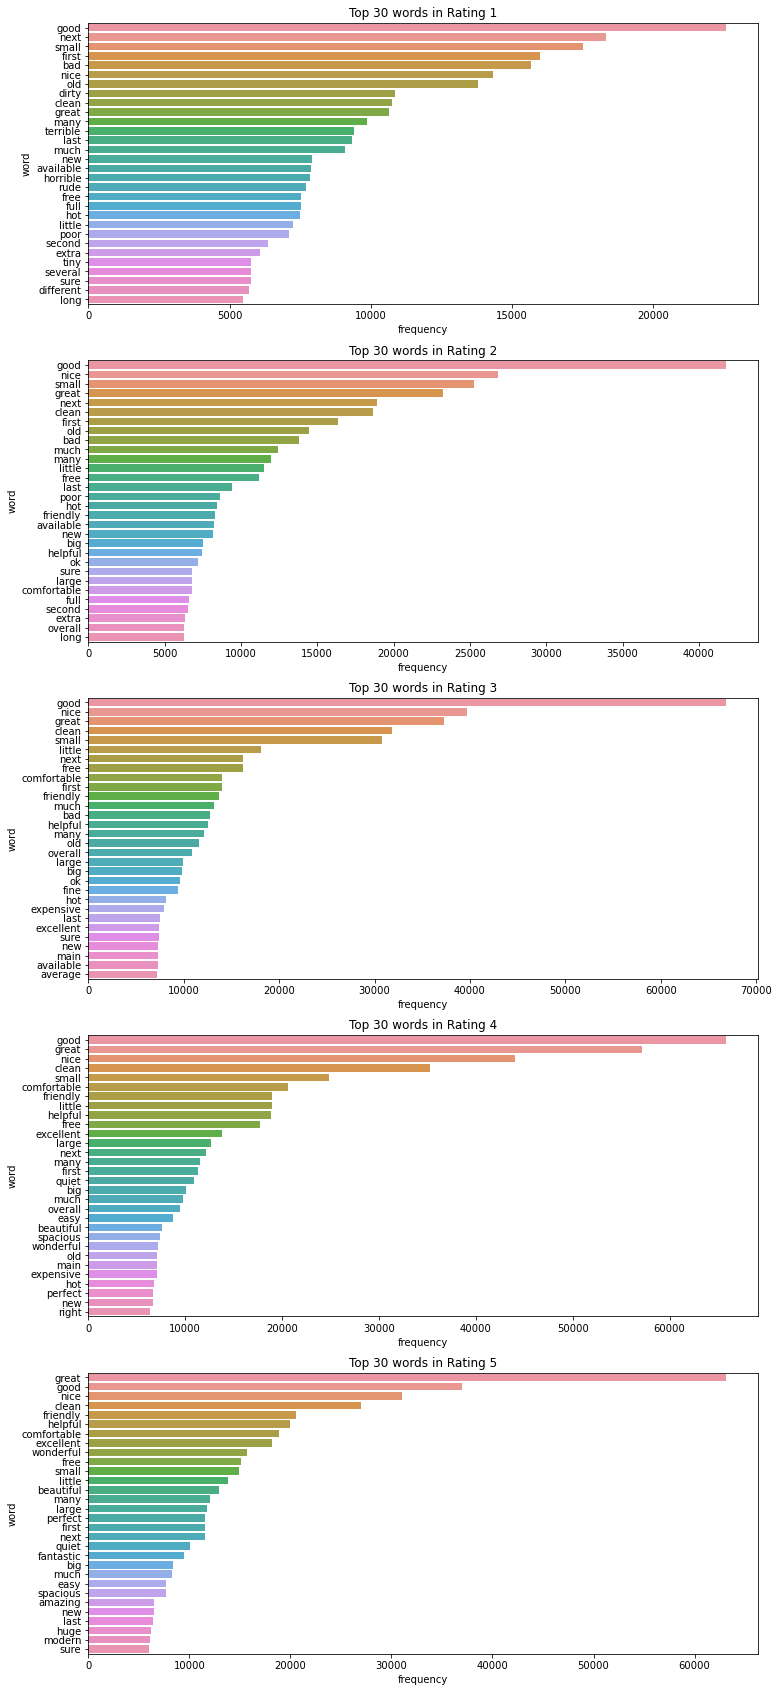

In [95]:
#plot the graphy
fig, axes = plt.subplots(5,1,figsize=(12,30))
sns.barplot(ax=axes[0],x="frequency",y="word",data=data1.head(30)).set_title("Top 30 words in Rating 1")
sns.barplot(ax=axes[1],x="frequency",y="word",data=data2.head(30)).set_title("Top 30 words in Rating 2")
sns.barplot(ax=axes[2],x="frequency",y="word",data=data3.head(30)).set_title("Top 30 words in Rating 3")
sns.barplot(ax=axes[3],x="frequency",y="word",data=data4.head(30)).set_title("Top 30 words in Rating 4")
sns.barplot(ax=axes[4],x="frequency",y="word",data=data5.head(30)).set_title("Top 30 words in Rating 5")

The words frequently used in four-star and five-star reviews are very similar, with adjectives like “good,” “nice,” and “great” appearing most frequently. Interestingly, these exact words also appeared frequently in three-star, two-star, and one-star reviews. Based on the word clouds and bar chart, there seem to be no significant differences between reviews that received three to five stars. As for one-star and two-star reviews, only a few negative adjectives exist compared to the other three classes. and it is also hard to tell the feature differences between one-star and two-star reviews  



## 5. Preprocessing and Modeling

The dataset in this project is large contains a high-dimensional dataset. Firstly, DummyClassifier makes predictions that ignore the input features, and I will use this classifier as a simple baseline to compare against other more complex classifiers. Secondly, Multinomial NB will classify a document based on the counts it finds of multiple keywords. The naive assumption that predictors are independent is a powerful constraint that yields a highly interpretable model. Complex models with many parameters usually have lower bias but higher variance. When the predictors are not independent, Multinomial NB introduces the bias to the model. According to Bias and Variance trade-off,  the introduced bias may sufficiently reduce variance to perform better, especially in the text classification. Hence, I will choose Multinomial NB as one of the classifiers in this project. Lastly, I will compare with the Logistic Regression model as I assume independent variables are linear and log odds and be little or no multicollinearity among the independent variables. The default regularization function in logistic regression will penalize the less essential words and prevent overfitting.

#### Train/Test Split

In [96]:
# Create train_test_split.
X_train, X_test, y_train, y_test = train_test_split(overall["adjective"],
                                                    overall['overall'],
                                                    test_size = 0.20,
                                                    random_state = 42,)

#### Text cleaning

In [97]:
#clean the test and train set data
clean_train = []
for item in X_train:
    clean_train.append(clean_text(item))
clean_test = []
for item in X_test:
    clean_test.append(clean_text(item))

#### TfidfVectorizer VS CountVectorizer 

Both methods can convert text data into vectors as the model can only process numerical data. CountVectorizer only counts the number of times a word appears in the document.TfidfVectorizer will consider the overall document weightage by measuring how often they appear in the documents. 

Using Countvectorizer will result in biasing in favor of most frequent words and ignoring rare words, which could help model our data more efficiently. Hence, to overcome this, TfidfVectorizer is a better choice.

Scikit-learn’s Tfidftransformer and Tfidfvectorizer aim to do the same thing. With Tfidftransformer, you will systematically compute word counts using CountVectorizer and then compute the Inverse Document Frequency (IDF) values and only then compute the Tf-IDF scores.

This project will convert our text documents to a matrix of token counts (CountVectorizer), then transform a count matrix to a normalized TF-IDF representation (TF-IDF transformer). After that, we train several classifiers from the Scikit-Learn library.

#### Baseline model-Dummy Classifier

In [101]:
#Baseline model
dummy = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', DummyClassifier(strategy="most_frequent")),
              ])
dummy.fit(clean_train, y_train)

y_pred = dummy.predict(clean_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00     16171
         2.0       0.00      0.00      0.00     16204
         3.0       0.00      0.00      0.00     16307
         4.0       0.20      1.00      0.33     16024
         5.0       0.00      0.00      0.00     16088

    accuracy                           0.20     80794
   macro avg       0.04      0.20      0.07     80794
weighted avg       0.04      0.20      0.07     80794



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Multinomial NB

In [213]:
#modeling and predicting by multinomial NB
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(clean_train, y_train)

y_pred = nb.predict(clean_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.65      0.54      0.59     16171
         2.0       0.42      0.33      0.37     16204
         3.0       0.44      0.40      0.42     16307
         4.0       0.34      0.53      0.42     16024
         5.0       0.61      0.56      0.59     16088

    accuracy                           0.47     80794
   macro avg       0.49      0.47      0.48     80794
weighted avg       0.49      0.47      0.48     80794



#### Logistic Regression

In [214]:
#modeling and predicting by multinomial LG
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(clean_train, y_train)


y_pred = logreg.predict(clean_test)


print(classification_report(y_test, y_pred))

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         1.0       0.47      0.72      0.57     16171
         2.0       0.43      0.34      0.38     16204
         3.0       0.46      0.39      0.42     16307
         4.0       0.45      0.39      0.42     16024
         5.0       0.61      0.58      0.59     16088

    accuracy                           0.48     80794
   macro avg       0.48      0.48      0.48     80794
weighted avg       0.48      0.48      0.48     80794



## 7. Evaluation

|                           |Dummy     |MNB      |LR       |
|-------------------------- |----------|---------|---------|
|Accuracy                   |0.20      |0.47     |0.48     | 

Both Multinomial NB and Logistic Regression models outperform the baseline model dummy classifier. The logistic regression model has better accuracy in predicting new data. The Multinomial NB shows better in predicting for one-star rating and five-star rating as they has the highest f1-score 0.59, while logistic regression shows better in predicting for five-star rating as it has the highest f1-score 0.59. Both models have a poor prediction for a two-star rating as they both have the lowest f1 score. Recall and precision are equally crucial for multiclassification problems in this project, and there is always a trade-off between Recall and specificity. Hence We will not use metrics: precision,  Recall to compare the two models' performance. Instead, we will only reach their accuracy and f1 score. However, both models show low accuracy in predicting new data.
When exploring the words feature in the word cloud and bar chart, we noticed many standard features exist between the classes. It might be a cause for the low prediction accuracy. Further,  We will remove those common adjective words to make each class have more unique features for modeling and see whether it will improve the accuracy.

## 8. Strategy 2- Remove the Top 100 most Frequent Adjective Words

In [183]:
#find the top 100 adjective words and convert to a set
words =overall["adjective"].values.tolist()
words=" ".join(words)
letters_only = re.sub("\W", " ", words)
remove_single_letter = re.sub(" \w ", " ", letters_only)
remove_single_number = re.sub(" \w ", " ", remove_single_letter)
words = remove_single_number.lower().split()
stops = set(stopwords.words('english'))
meaningful_words = [w for w in words if not w in stops]
lemmatizer = WordNetLemmatizer()
meaningful_words_lem = [lemmatizer.lemmatize(i) for i in meaningful_words]
word_counts = Counter(meaningful_words_lem)
n_most_common = word_counts.most_common(100)
common=[i for i,_ in n_most_common]
common=set(common)

In [185]:
#define a funtion to clean the text feature
def clean_text1(feature):
   
    # 1. remove punctuations, single letters, "http", ect unneccessary words 
    letters_only = re.sub("\W", " ", feature)
    remove_single_letter = re.sub(" \w ", " ", letters_only)
    remove_single_number = re.sub(" \w ", " ", remove_single_letter)

    
     # 2. Convert to lower case, split into individual words.
    words = remove_single_number.lower().split()
    
     # 3. Convert the stop words to a set.
    stops = set(stopwords.words('english'))
    stops = set. union(stops, common)
    
     # 4. Remove stop words.
    meaningful_words = [w for w in words if not w in stops]
   
     # 5. return base/dictionary form of a word
    lemmatizer = WordNetLemmatizer()
    meaningful_words_lem = [lemmatizer.lemmatize(i) for i in meaningful_words]
     
    return (" ".join(meaningful_words_lem))

In [196]:
#clean the text feature and put them in the seperate list
cleantext1=[]
for review in overall["adjective"][overall["overall"]==1.0]:
          cleantext1.append(clean_text1(review))

In [197]:
#clean the text feature and put them in the seperate list
cleantext2=[]
for review in overall["adjective"][overall["overall"]==2.0]:
          cleantext2.append(clean_text1(review))

In [198]:
#clean the text feature and put them in the seperate list
cleantext3=[]
for review in overall["adjective"][overall["overall"]==3.0]:
          cleantext3.append(clean_text1(review))

In [199]:
#clean the text feature and put them in the seperate list
cleantext4=[]
for review in overall["adjective"][overall["overall"]==4.0]:
          cleantext4.append(clean_text1(review))

In [200]:
#clean the text feature and put them in the seperate list
cleantext5=[]
for review in overall["adjective"][overall["overall"]==5.0]:
          cleantext5.append(clean_text1(review))

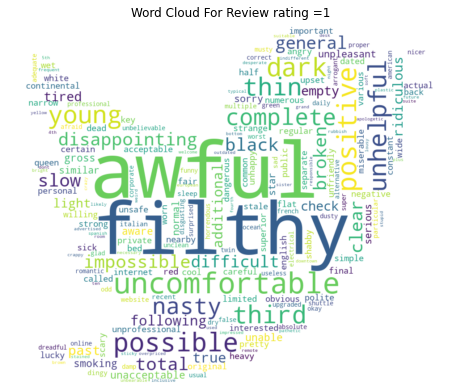

In [201]:
## Draw word cloud for reviews
text = " ".join(reviews for reviews in cleantext1)
twitter_mask = np.array(Image.open("./twitter_mask.png"))
wordcloud = WordCloud(background_color="white",mask=twitter_mask,).generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud For Review rating =1")
plt.axis("off")
plt.show()

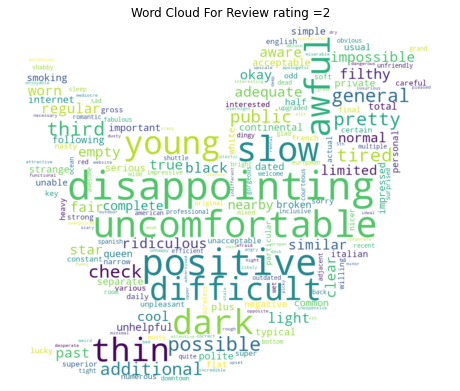

In [206]:
## Draw word cloud for reviews
text = " ".join(reviews for reviews in cleantext2)
twitter_mask = np.array(Image.open("./twitter_mask.png"))
wordcloud = WordCloud(background_color="white",mask=twitter_mask,).generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud For Review rating =2")
plt.axis("off")
plt.show()

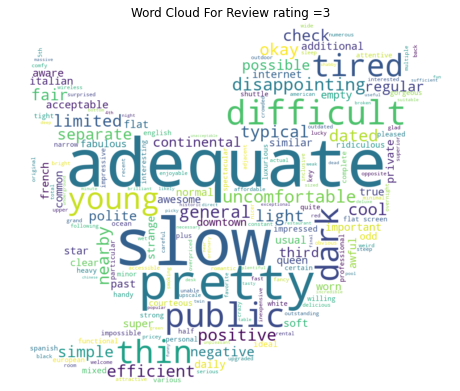

In [207]:
## Draw word cloud for reviews
text = " ".join(reviews for reviews in cleantext3)
twitter_mask = np.array(Image.open("./twitter_mask.png"))
wordcloud = WordCloud(background_color="white",mask=twitter_mask,).generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud For Review rating =3")
plt.axis("off")
plt.show()

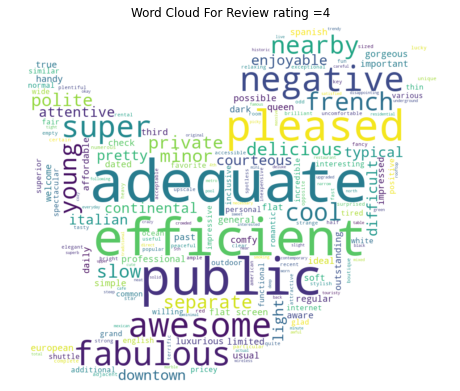

In [209]:
## Draw word cloud for reviews
text = " ".join(reviews for reviews in cleantext4)
twitter_mask = np.array(Image.open("./twitter_mask.png"))
wordcloud = WordCloud(background_color="white",mask=twitter_mask,).generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud For Review rating =4")
plt.axis("off")
plt.show()

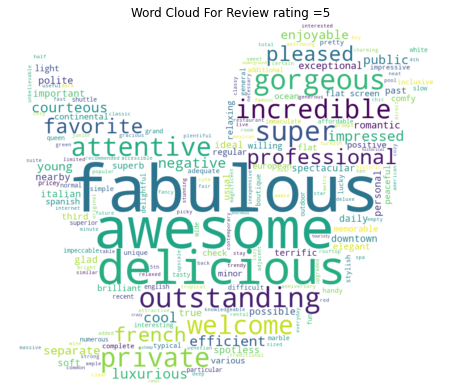

In [208]:
## Draw word cloud for reviews
text = " ".join(reviews for reviews in cleantext5)
twitter_mask = np.array(Image.open("./twitter_mask.png"))
wordcloud = WordCloud(background_color="white",mask=twitter_mask,).generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud For Review rating =5")
plt.axis("off")
plt.show()

In [210]:
data_1=word_frequency(cleantext1)[0]
data_2=word_frequency(cleantext2)[0]
data_3=word_frequency(cleantext3)[0]
data_4=word_frequency(cleantext4)[0]
data_5=word_frequency(cleantext5)[0]

Text(0.5, 1.0, 'Top 30 words in Rating 5')

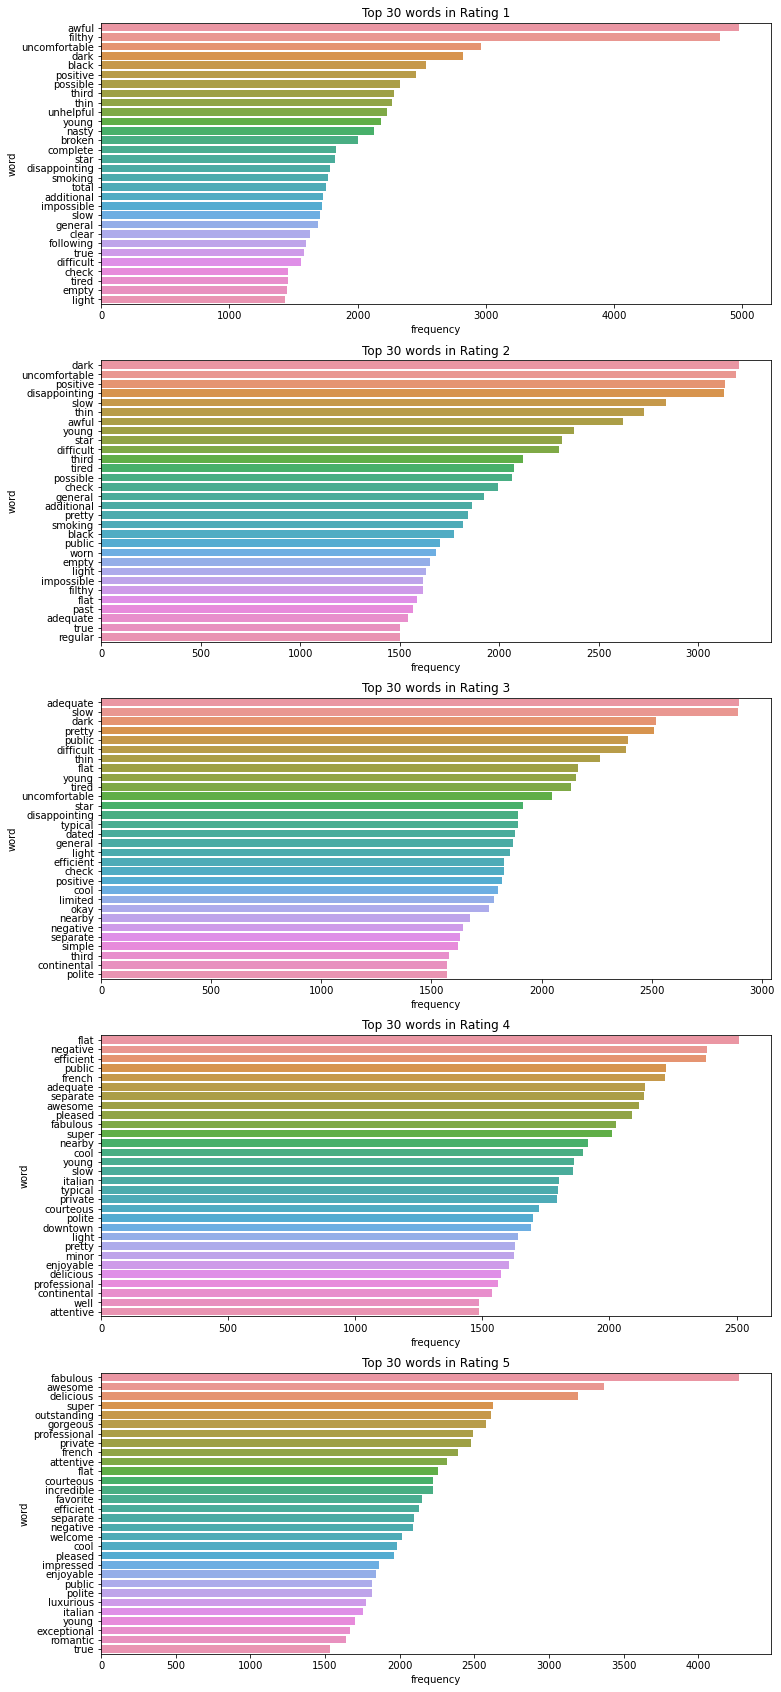

In [211]:
#plot the graphy
fig, axes = plt.subplots(5,1,figsize=(12,30))
sns.barplot(ax=axes[0],x="frequency",y="word",data=data_1.head(30)).set_title("Top 30 words in Rating 1")
sns.barplot(ax=axes[1],x="frequency",y="word",data=data_2.head(30)).set_title("Top 30 words in Rating 2")
sns.barplot(ax=axes[2],x="frequency",y="word",data=data_3.head(30)).set_title("Top 30 words in Rating 3")
sns.barplot(ax=axes[3],x="frequency",y="word",data=data_4.head(30)).set_title("Top 30 words in Rating 4")
sns.barplot(ax=axes[4],x="frequency",y="word",data=data_5.head(30)).set_title("Top 30 words in Rating 5")

#### Proprocessing, modeling and evaluation

#### Text clean

In [212]:
#clean the test and train set data
cleantrain = []
for item in X_train:
    cleantrain.append(clean_text1(item))
cleantest = []
for item in X_test:
    cleantest.append(clean_text1(item))

#### Baseline model-dummy classifier

In [215]:
#Baseline model
dummy = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', DummyClassifier(strategy="most_frequent")),
              ])
dummy.fit(cleantrain, y_train)

y_pred = dummy.predict(cleantest)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00     16171
         2.0       0.00      0.00      0.00     16204
         3.0       0.00      0.00      0.00     16307
         4.0       0.20      1.00      0.33     16024
         5.0       0.00      0.00      0.00     16088

    accuracy                           0.20     80794
   macro avg       0.04      0.20      0.07     80794
weighted avg       0.04      0.20      0.07     80794



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Multinomial NB

In [216]:
#modeling and predicting by multinomial NB
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(cleantrain, y_train)

y_pred = nb.predict(cleantest)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.54      0.47      0.50     16171
         2.0       0.37      0.28      0.31     16204
         3.0       0.37      0.28      0.32     16307
         4.0       0.29      0.49      0.36     16024
         5.0       0.52      0.47      0.49     16088

    accuracy                           0.40     80794
   macro avg       0.42      0.40      0.40     80794
weighted avg       0.42      0.40      0.40     80794



#### Logistic Regression

In [217]:
#modeling and predicting by multinomial LG
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(cleantrain, y_train)


y_pred = logreg.predict(cleantest)


print(classification_report(y_test, y_pred))

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         1.0       0.53      0.48      0.50     16171
         2.0       0.37      0.27      0.31     16204
         3.0       0.37      0.26      0.31     16307
         4.0       0.28      0.50      0.36     16024
         5.0       0.51      0.47      0.49     16088

    accuracy                           0.40     80794
   macro avg       0.41      0.40      0.40     80794
weighted avg       0.41      0.40      0.39     80794



#### Evaluation

|                           |Accuracy(S1)|Accuracy(S2)|
|-------------------------- |------------|------------|
|Dummy                      |0.20        |0.20        |
|MNB                        |0.47        |0.40        |
|LG                         |0.48        |0.40        |

Removing the top 100 common adjective words does not improve the model performance as expected. Reducing the most popular features result in accuracy loss for both models. Since the classifiers have poor accuracy performance for multi-class classification, now we will switch to binary classification.

## 9. Strategy 3-Convert to Binary Classification

In [228]:
#read the csv File
overall = pd.read_csv('./overall.csv')

We group one-star to four-star ratings as one class and five-star ratings as another. we will model and predict a five-star rating, or else

In [229]:
#creat a column label 5-star rating as 1, rest as 0
overall['dummy'] =  (overall['overall']==5.0).astype(int)

Grouping one star to four start ratings together will create an unbalanced dataset again. We will downsize the majority group to balance the dataset.

In [230]:
#balance the dataset by downsize the majority class
overall_majority = overall[overall.dummy==0]
overall_minority = overall[overall.dummy==1]
 
# Downsample majority class
overall_majority_downsampled = resample(overall_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=80794,     # to match minority class
                                 random_state=123) # reproducible results

 
# Combine minority class with downsampled majority class
overall = pd.concat([overall_majority_downsampled, overall_minority])
overall["dummy"].value_counts()

1    80794
0    80794
Name: dummy, dtype: int64

#### Text Mining of the Review Text-with Top 100 common words

In [234]:
#clean the text feature and put them in the seperate list
cleantext_a=[]
for review in overall["adjective"][overall["dummy"]==1]:
          cleantext_a.append(clean_text(review))

In [235]:
#clean the text feature and put them in the seperate list
cleantext_b=[]
for review in overall["adjective"][overall["dummy"]==0]:
          cleantext_b.append(clean_text(review))

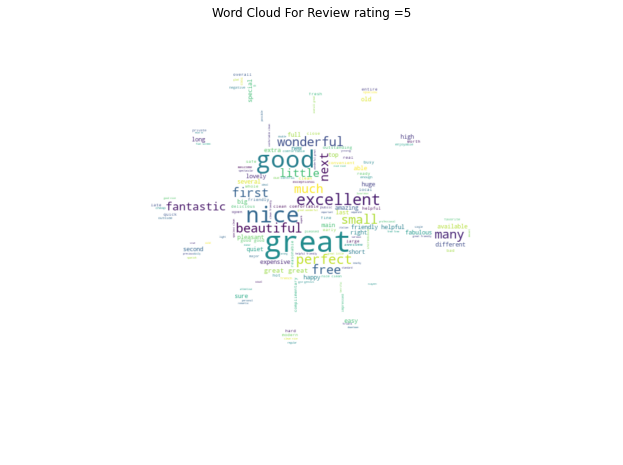

In [237]:
## Draw word cloud for reviews
text = " ".join(reviews for reviews in cleantext_a)
twitter_mask = np.array(Image.open("./coronavirus.jpg"))
wordcloud = WordCloud(background_color="white",mask=twitter_mask,).generate(text)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud For Review rating =5")
plt.axis("off")
plt.show()

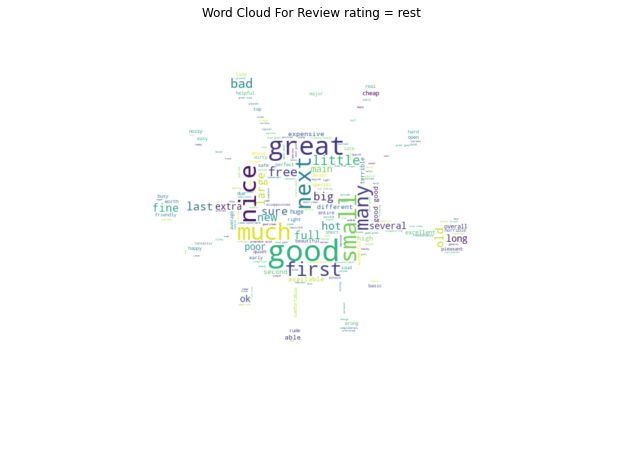

In [238]:
## Draw word cloud for reviews
text = " ".join(reviews for reviews in cleantext_b)
twitter_mask = np.array(Image.open("./coronavirus.jpg"))
wordcloud = WordCloud(background_color="white",mask=twitter_mask,).generate(text)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud For Review rating = rest")
plt.axis("off")
plt.show()

In [239]:
data_a=word_frequency(cleantext_a)[0]
data_b=word_frequency(cleantext_b)[0]

Text(0.5, 1.0, 'Top 30 words in Rest')

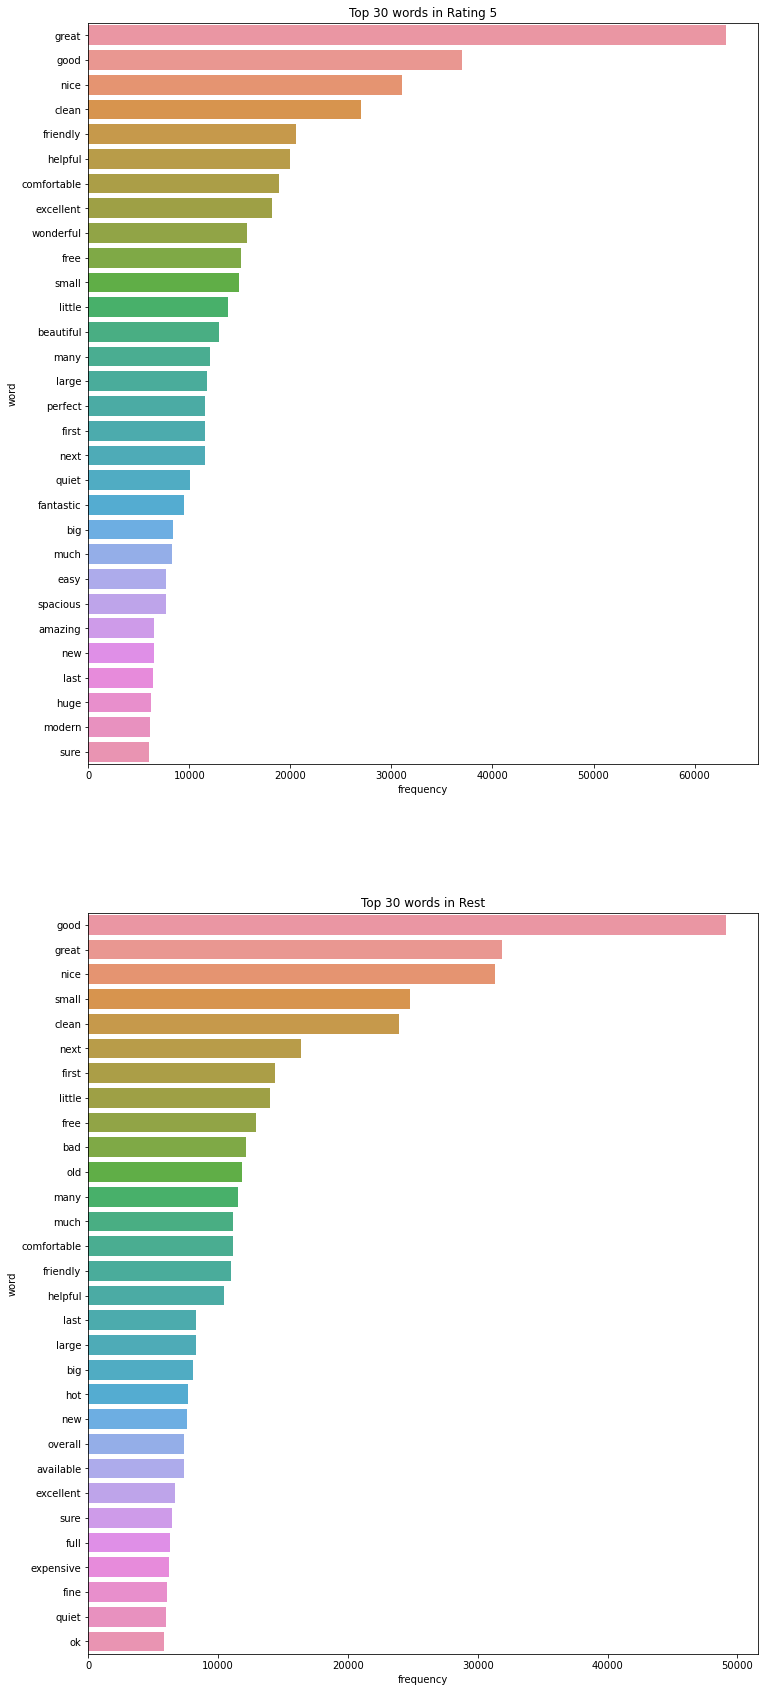

In [240]:
#plot the graphy
fig, axes = plt.subplots(2,1,figsize=(12,30))
sns.barplot(ax=axes[0],x="frequency",y="word",data=data_a.head(30)).set_title("Top 30 words in Rating 5")
sns.barplot(ax=axes[1],x="frequency",y="word",data=data_b.head(30)).set_title("Top 30 words in Rest")

#### Proprocessing and Modeling

In [241]:
# Create train_test_split.
X_train, X_test, y_train, y_test = train_test_split(overall["adjective"],
                                                    overall['dummy'],
                                                    test_size = 0.20,
                                                    random_state = 42,)

In [242]:
#clean the test and train set data
cleantrain_a = []
for item in X_train:
    cleantrain_a.append(clean_text(item))
cleantest_a = []
for item in X_test:
    cleantest_a.append(clean_text(item))

In [243]:
#Baseline model
dummy = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', DummyClassifier(strategy="most_frequent")),
              ])
dummy.fit(cleantrain_a, y_train)

y_pred = dummy.predict(cleantest_a)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.66     16060
           1       0.00      0.00      0.00     16258

    accuracy                           0.50     32318
   macro avg       0.25      0.50      0.33     32318
weighted avg       0.25      0.50      0.33     32318



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [244]:
#modeling and predicting by multinomial NB
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(cleantrain_a, y_train)

y_pred = nb.predict(cleantest_a)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78     16060
           1       0.79      0.76      0.78     16258

    accuracy                           0.78     32318
   macro avg       0.78      0.78      0.78     32318
weighted avg       0.78      0.78      0.78     32318



In [246]:
#modeling and predicting by multinomial LG
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(cleantrain_a, y_train)


y_pred = logreg.predict(cleantest_a)


print(classification_report(y_test, y_pred))

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.75      0.82      0.78     16060
           1       0.80      0.73      0.76     16258

    accuracy                           0.77     32318
   macro avg       0.78      0.77      0.77     32318
weighted avg       0.78      0.77      0.77     32318



#### Text Mining of the Review Text-without Top 100 common words

In [247]:
#clean the text feature and put them in the seperate list
cleantext_A=[]
for review in overall["adjective"][overall["dummy"]==1]:
          cleantext_A.append(clean_text1(review))

In [248]:
#clean the text feature and put them in the seperate list
cleantext_B=[]
for review in overall["adjective"][overall["dummy"]==0]:
          cleantext_B.append(clean_text1(review))

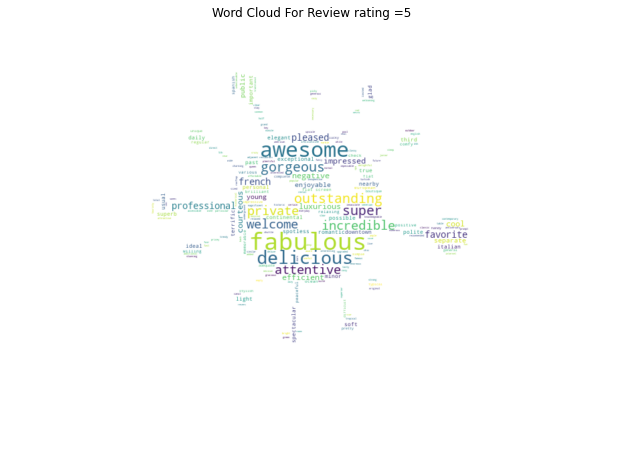

In [249]:
## Draw word cloud for reviews
text = " ".join(reviews for reviews in cleantext_A)
twitter_mask = np.array(Image.open("./coronavirus.jpg"))
wordcloud = WordCloud(background_color="white",mask=twitter_mask,).generate(text)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud For Review rating =5")
plt.axis("off")
plt.show()

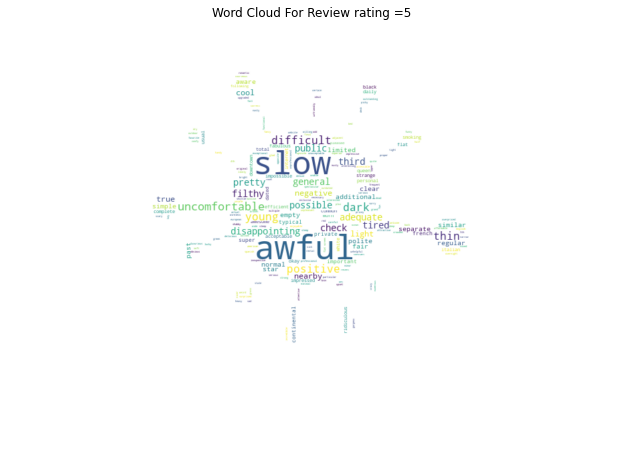

In [250]:
## Draw word cloud for reviews
text = " ".join(reviews for reviews in cleantext_B)
twitter_mask = np.array(Image.open("./coronavirus.jpg"))
wordcloud = WordCloud(background_color="white",mask=twitter_mask,).generate(text)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud For Review rating =5")
plt.axis("off")
plt.show()

In [251]:
data_A=word_frequency(cleantext_A)[0]
data_B=word_frequency(cleantext_B)[0]

Text(0.5, 1.0, 'Top 30 words in Rest')

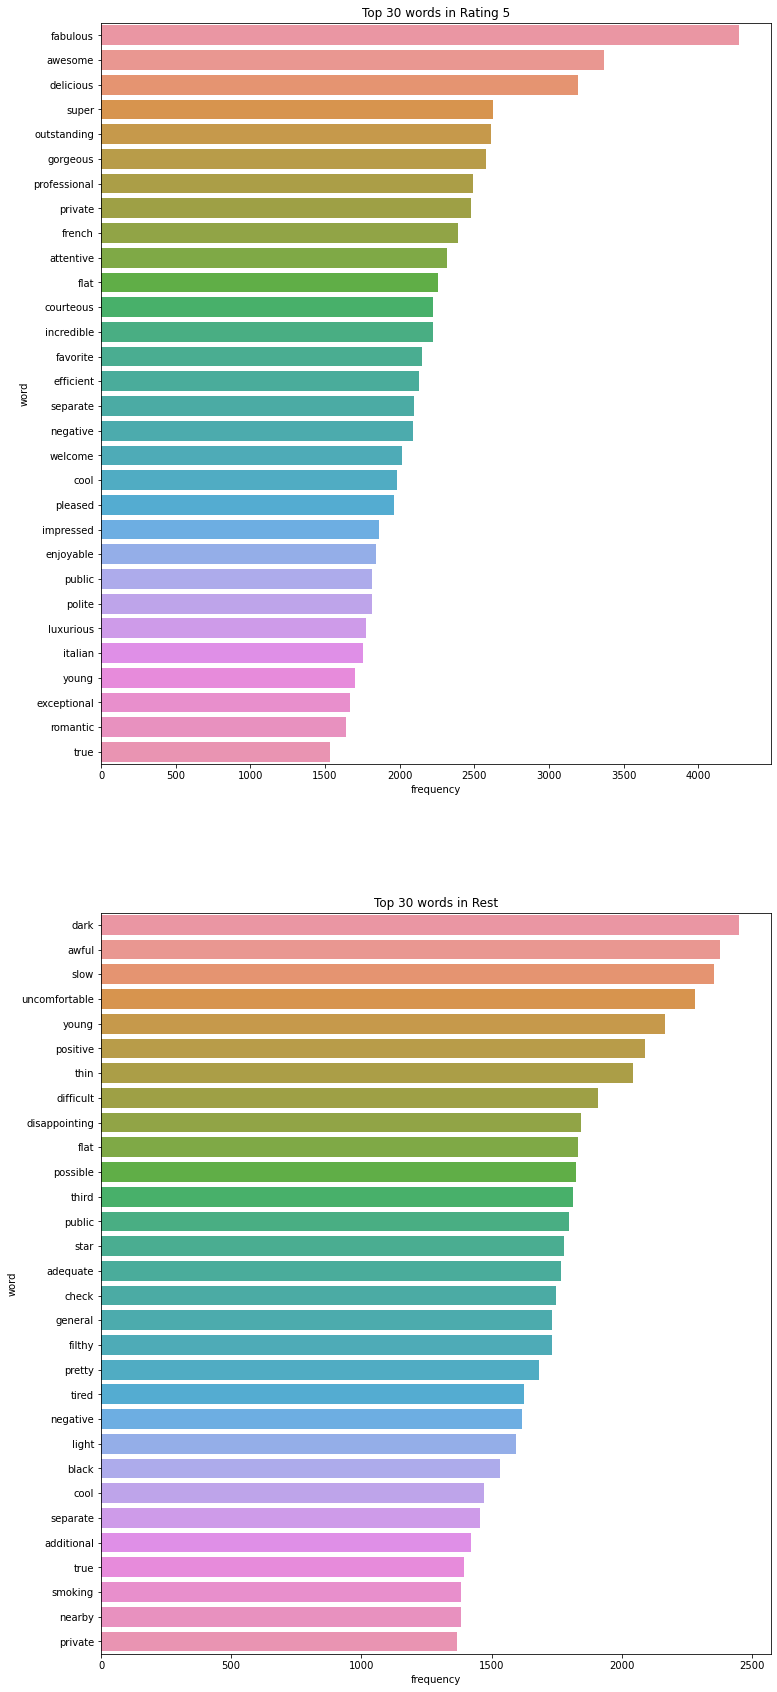

In [253]:
#plot the graphy
fig, axes = plt.subplots(2,1,figsize=(12,30))
sns.barplot(ax=axes[0],x="frequency",y="word",data=data_A.head(30)).set_title("Top 30 words in Rating 5")
sns.barplot(ax=axes[1],x="frequency",y="word",data=data_B.head(30)).set_title("Top 30 words in Rest")

In [254]:
#clean the test and train set data
cleantrain_b = []
for item in X_train:
    cleantrain_b.append(clean_text1(item))
cleantest_b = []
for item in X_test:
    cleantest_b.append(clean_text1(item))

In [255]:
#Baseline model
dummy = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', DummyClassifier(strategy="most_frequent")),
              ])
dummy.fit(cleantrain_b, y_train)

y_pred = dummy.predict(cleantest_b)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.66     16060
           1       0.00      0.00      0.00     16258

    accuracy                           0.50     32318
   macro avg       0.25      0.50      0.33     32318
weighted avg       0.25      0.50      0.33     32318



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [256]:
#modeling and predicting by multinomial NB
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(cleantrain_b, y_train)

y_pred = nb.predict(cleantest_b)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73     16060
           1       0.75      0.65      0.70     16258

    accuracy                           0.71     32318
   macro avg       0.72      0.72      0.71     32318
weighted avg       0.72      0.71      0.71     32318



In [257]:
#modeling and predicting by multinomial LG
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(cleantrain_b, y_train)


y_pred = logreg.predict(cleantest_b)


print(classification_report(y_test, y_pred))

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.77      0.60      0.67     16060
           1       0.67      0.82      0.74     16258

    accuracy                           0.71     32318
   macro avg       0.72      0.71      0.71     32318
weighted avg       0.72      0.71      0.71     32318



#### Evaluation

|                           |Accuracy(S1)|Accuracy(S2)|Accuracy(S3)|Accuracy(S4)|
|-------------------------- |------------|------------|------------|------------|
|Dummy                      |0.20        |0.20        |0.50        |0.50        |
|MNB                        |0.47        |0.40        |0.78        |0.71        |
|LG                         |0.48        |0.40        |0.77        |0.71        |

The binary classification shows a significate improvement in predicting accuracy compared to multiclassification. Reducing the top 100 popular features again resulted in accuracy loss in binary classification. Multinomial NB slightly outperforms the logistic regressing when all the adjective word features remain.

## 10. Conclusion

Tripadvisor is an ideal platform for H Hotel to partner. A reliable Machine learning model to predict the future Rating in the Tripadvisor platform is essential for evaluating the partnership's success.

The Documents collected from uiuc.edu are preprocessed by removing the stopwords and punctuations and returning to based form words. We found the documents contained unnecessary information for modeling during the Data Exploring Analysis. We decided only to keep the adjective phrases for modeling. Considering the complexity of this project's features, we use the Multinomial NB and Logistic Regression modeling method to predict the outcomes.

The result shows Multi-class classification did not perform as well as binary classification. Multi-class has very low accuracy in predicting a 1 to 5-star Rating and converting to Binary classification, a significate improvement for the accuracy. Features reduction will result in accuracy loss. Multinomial NB shows slightly better accuracy than logistic regression in Binary classification. We may deploy Multinomial NB to predict the possibility of getting a 5-star Rating in Tripadvisor for Hotel H.

Further, we will continue to explore NLP techniques. We could dive deeper into aspect rating studying, opinion grouping the Text data, or sentimental analysis. Those will help to improve model performance in the future for sure.
